In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import hiive.mdptoolbox as mdptoolbox
P, R = mdptoolbox.example.forest()
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()
vi.policy # result is (0, 0, 0)

(0, 0, 0)

In [5]:
from hiive.mdptoolbox.example import forest

In [6]:
forest

<function hiive.mdptoolbox.example.forest(S=3, r1=4, r2=2, p=0.1, is_sparse=False)>

In [12]:
P, R = mdptoolbox.example.forest(S=400)
q = mdptoolbox.mdp.QLearning(P, R, 0.99)
run_stats = q.run()

In [13]:
run_stats[-1]

{'State': 47,
 'Action': 0,
 'Reward': 0.0,
 'Error': 0.002753437235474185,
 'Time': 0.6432440280914307,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.99,
 'V[0]': 2.781249732802207,
 'Max V': 3.2725956258015017,
 'Mean V': 0.019014129338937973,
 'Iteration': 10000}

In [15]:
import matplotlib.pyplot as plt

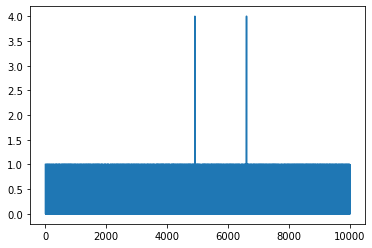

In [16]:
plt.plot([x["Reward"] for x in run_stats])

In [17]:
from hiive.examples.firemdp import getTransitionAndRewardArrays

In [20]:
P, R = getTransitionAndRewardArrays(0.8)
q = mdptoolbox.mdp.QLearning(P, R, 0.99)
run_stats = q.run()

In [24]:
import numpy as np

In [39]:
P, R = getTransitionAndRewardArrays(0.8)
q = mdptoolbox.mdp.QLearning(P, R, 0.80)
run_stats2 = q.run()

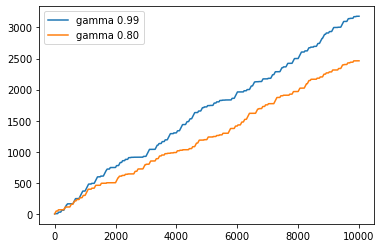

In [40]:

plt.plot(np.cumsum([x["Reward"] for x in run_stats1]), label="gamma 0.99")
plt.plot(np.cumsum([x["Reward"] for x in run_stats2]), label="gamma 0.80")
plt.legend()

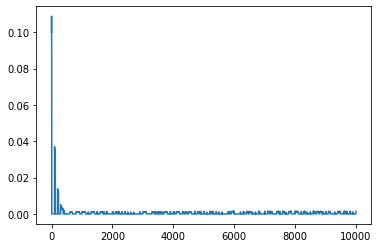

In [41]:
plt.plot([x["Error"] for x in run_stats])

## Episodes?

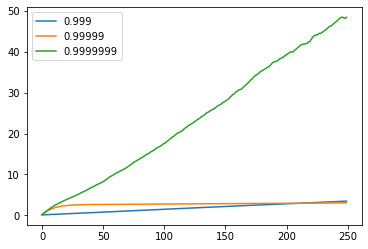

In [89]:
P, R = getTransitionAndRewardArrays(0.1)

for decay in [1-1e-3, 1-1e-5, 1-1e-7]:
    average_metric_per_episode = []
    Qs = []
    q = mdptoolbox.mdp.QLearning(P, R, 0.99, epsilon_decay=decay, alpha_decay=decay)
    for episode in range(250):
        run_stats = q.run()
        # print(q.epsilon)
        Qs.append(q.Q)
        average_metric_per_episode.append(np.mean([x["Mean V"] for x in run_stats]))

    plt.plot(average_metric_per_episode, label=decay)
plt.legend()

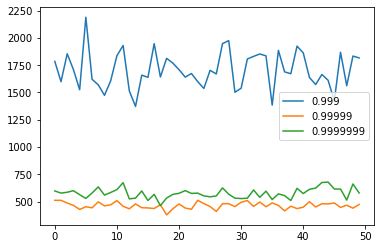

In [88]:
P, R = getTransitionAndRewardArrays(0.1)

for decay in [1-1e-3, 1-1e-5, 1-1e-7]:
    average_metric_per_episode = []
    Qs = []
    q = mdptoolbox.mdp.QLearning(P, R, 0.99, epsilon_decay=decay, alpha_decay=decay)
    for episode in range(50):
        run_stats = q.run()
        # print(q.epsilon)
        Qs.append(q.Q)
        average_metric_per_episode.append(np.sum([x["Reward"] for x in run_stats]))

    plt.plot(average_metric_per_episode, label=decay)
plt.legend()

In [ ]:
q.Qs

In [ ]:
for i in range(len(q.Qs)-1):
    print(np.array_equal(q.Qs[i], q.Qs[i+1]))